## 1. Importing Required Libraries:

In [1]:
# Data Handling
import pandas as pd          # For handling and analyzing datasets
import numpy as np           # For numerical computations

# Preprocessing & Splitting
from sklearn.model_selection import train_test_split   # Train/test split
from sklearn.preprocessing import PowerTransformer      # Normalize/transform feature distribution

# Classification Models
from sklearn.linear_model import LogisticRegression     # Logistic Regression classifier
from sklearn.tree import DecisionTreeClassifier         # Decision Tree classifier
from sklearn.ensemble import RandomForestClassifier     # Random Forest classifier
from sklearn.svm import SVC                             # Support Vector Machine classifier

# Dimensionality Reduction
from sklearn.decomposition import PCA                   # Principal Component Analysis

# Handling Imbalanced Data
from imblearn.over_sampling import SMOTE                   # SMOTE(OverSampling)

# Evaluation Metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

# Model Validation & Hyperparameter Tuning
from sklearn.model_selection import cross_val_score     # Cross-validation
from sklearn.model_selection import GridSearchCV        # Grid Search for hyperparameter tuning

from imblearn.pipeline import Pipeline

## 2. EDA:

In [2]:
wine=pd.read_csv('winequality-red.csv',sep=';')

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#For checking,data contains null values or not(missing values)
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
#Finding the number of duplicated rows
wine.duplicated().sum()

np.int64(240)

In [6]:
#Now,drop the duplicated_rows
wine=wine.drop_duplicates()

In [7]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [8]:
#Convert into classification probelm:
wine['Quality_Label'] = wine['quality'].apply(lambda x: 1 if x >= 7 else 0)

In [9]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Quality_Label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0


In [10]:
#Drop the quality column because we need only Quality_Label
wine=wine.drop(columns=['quality'])

In [11]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Quality_Label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0


In [12]:
#For finding mathematical description:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Quality_Label
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,0.135394
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.342270
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


## 3. Features Engineering:

In [13]:
#Split the data into training data and testing data:
X=wine.drop(columns=['Quality_Label'])
y=wine['Quality_Label']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1016,8.9,0.38,0.40,2.2,0.068,12.0,28.0,0.99486,3.27,0.75,12.6
1519,6.6,0.70,0.08,2.6,0.106,14.0,27.0,0.99665,3.44,0.58,10.2
452,6.8,0.56,0.03,1.7,0.084,18.0,35.0,0.99680,3.44,0.63,10.0
847,7.4,0.68,0.16,1.8,0.078,12.0,39.0,0.99770,3.50,0.70,9.9
58,7.8,0.59,0.18,2.3,0.076,17.0,54.0,0.99750,3.43,0.59,10.0
...,...,...,...,...,...,...,...,...,...,...,...
1285,11.3,0.37,0.50,1.8,0.090,20.0,47.0,0.99734,3.15,0.57,10.5
1329,7.4,0.60,0.26,2.1,0.083,17.0,91.0,0.99616,3.29,0.56,9.8
1526,6.8,0.47,0.08,2.2,0.064,18.0,38.0,0.99553,3.30,0.65,9.6
1011,8.9,0.32,0.31,2.0,0.088,12.0,19.0,0.99570,3.17,0.55,10.4


In [15]:
print("Shape of X_train:",X_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape)

Shape of X_train: (1087, 11)
Shape of X_test: (272, 11)
Shape of y_train: (1087,)
Shape of y_test: (272,)


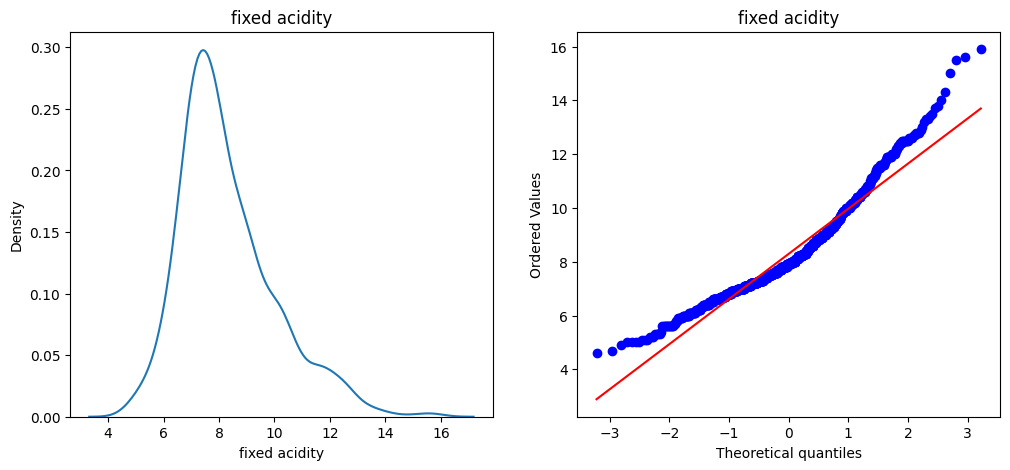

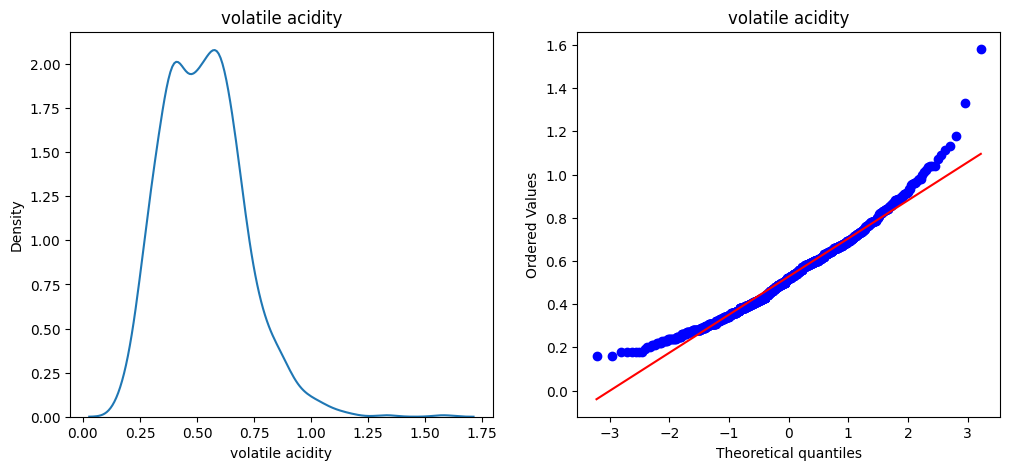

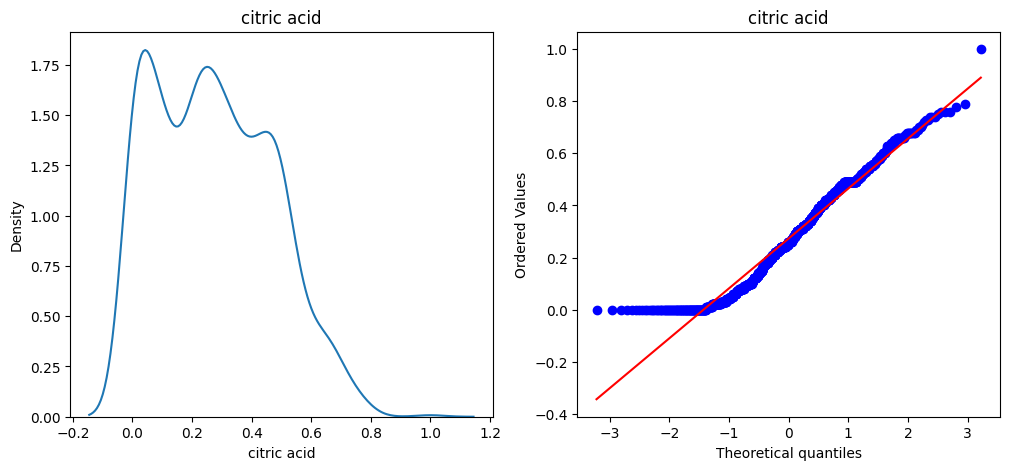

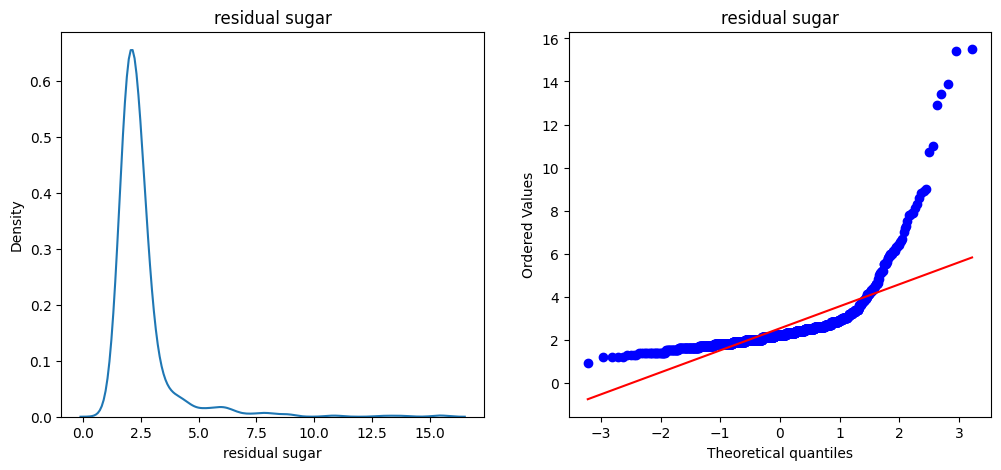

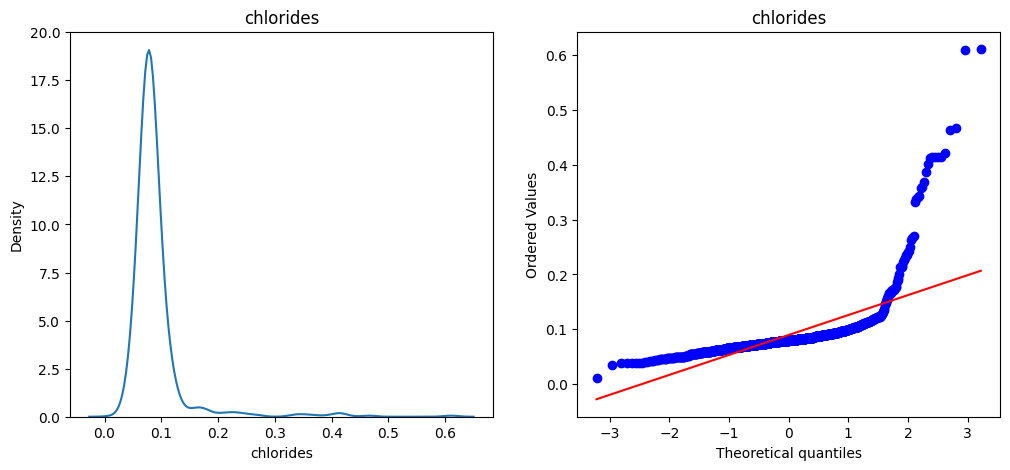

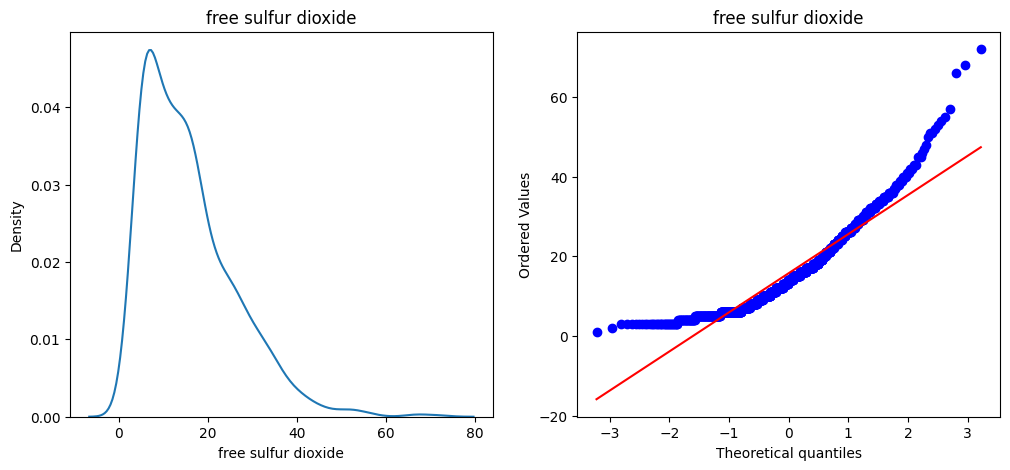

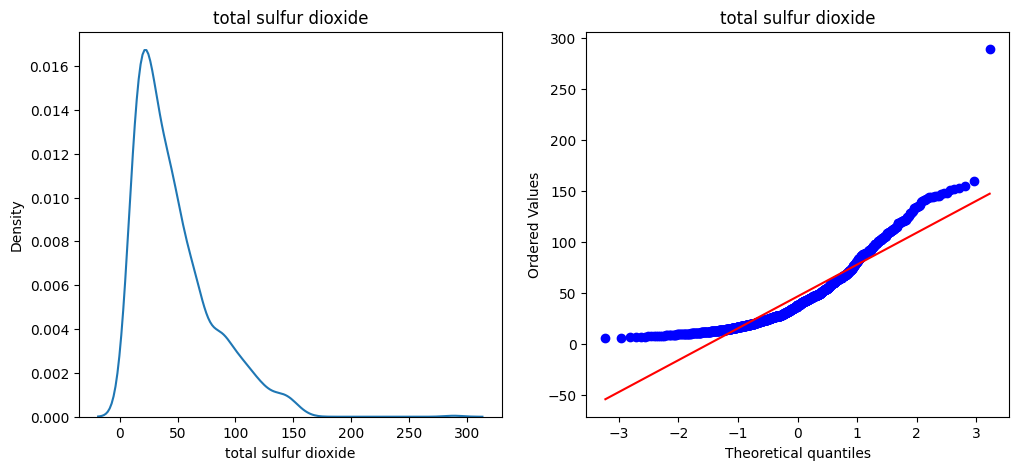

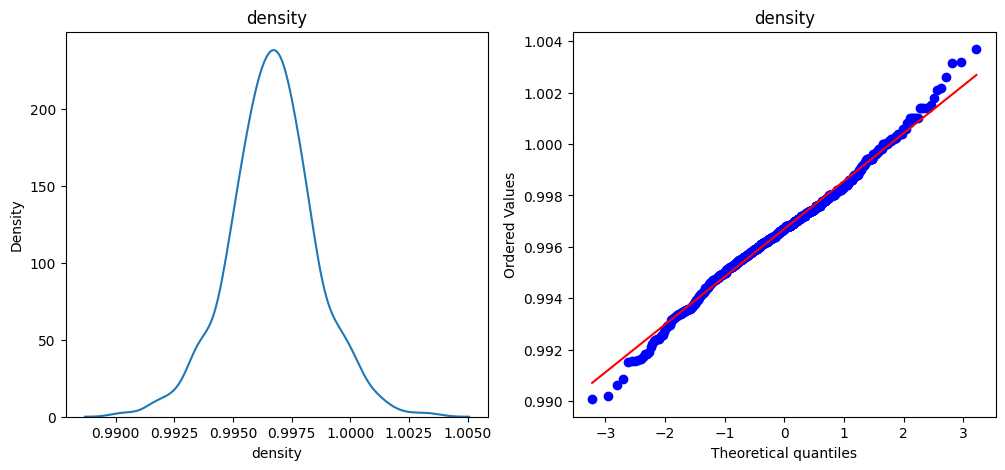

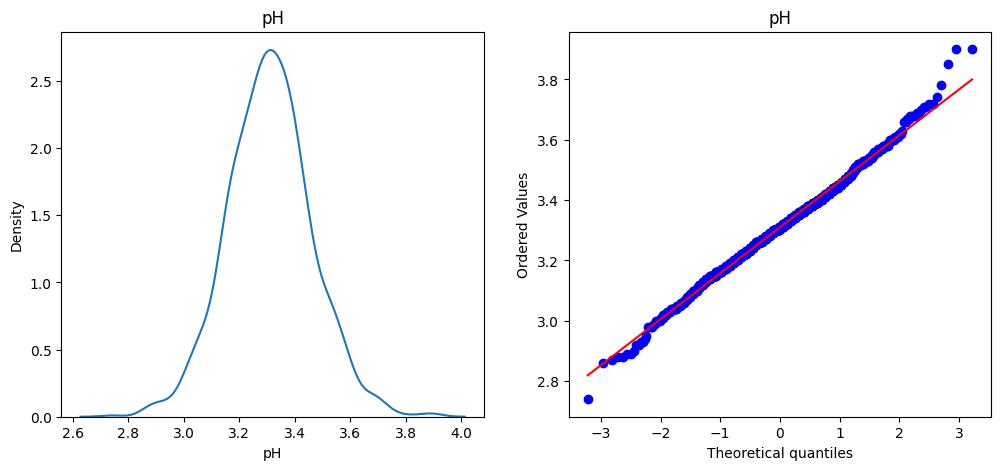

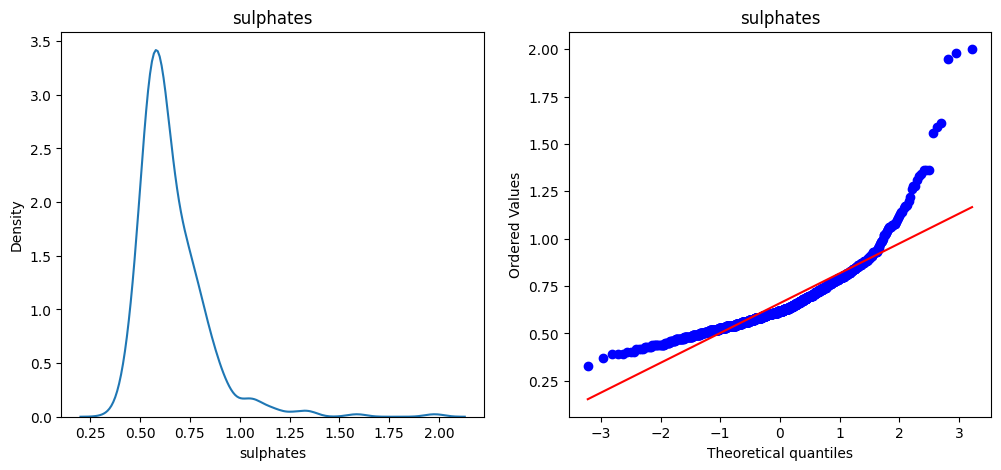

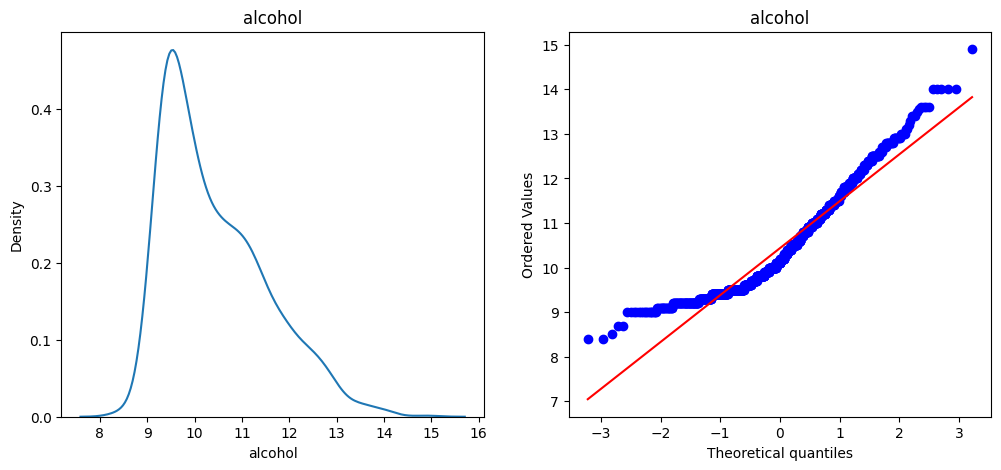

In [16]:
#Finding that which data of columns are normally distributed and for this we are plotting the 'kde' plot and 'QQ' plot

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

for column in X_train.columns:
    plt.figure(figsize=(12,5))
    plt.subplot(121)
    sns.kdeplot(X_train[column])
    plt.title(column)

    plt.subplot(122)
    stats.probplot(X_train[column],dist='norm',plot=plt)
    plt.title(column)

In [17]:
#Applying Powertransformer(Including Standarization):
pt=PowerTransformer(standardize=True)
X_train_transformed=pt.fit_transform(X_train)
X_test_transformed=pt.transform(X_test)

pd.DataFrame({'cols':X_train.columns,'yeo_johnson_lambdas':pt.lambdas_})

,cols,yeo_johnson_lambdas
0,fixed acidity,-0.872348
1,volatile acidity,-0.888169
2,citric acid,-0.378414
3,residual sugar,-2.052208
4,chlorides,-18.703735
5,free sulfur dioxide,0.058522
6,total sulfur dioxide,0.019599
7,density,-2.492609
8,pH,0.211141
9,sulphates,-4.216250


In [18]:
#Convert transformed data into dataframe:
X_train_transformed=pd.DataFrame(X_train_transformed,columns=X_train.columns)
X_test_transformed=pd.DataFrame(X_test_transformed,columns=X_test.columns)

X_train_transformed

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.518298,-0.823583,0.715318,-0.017572,-0.637835,-0.129500,-0.396995,-0.986579,-0.246900,0.821886,1.661336
1,-1.079615,1.001818,-1.007387,0.562448,0.995264,0.102370,-0.447511,-0.023880,0.861325,-0.392788,-0.020965
2,-0.905801,0.290267,-1.340740,-1.144490,0.188243,0.489676,-0.084962,0.056656,0.861325,0.034354,-0.248618
3,-0.431017,0.907031,-0.516024,-0.869178,-0.093580,-0.129500,0.067564,0.539430,1.244473,0.528693,-0.370030
4,-0.148286,0.452693,-0.400436,0.147739,-0.194593,0.400618,0.530495,0.432213,0.797070,-0.301700,-0.248618
...,...,...,...,...,...,...,...,...,...,...,...
1082,1.580944,-0.893545,1.145551,-0.869178,0.440945,0.655277,0.332248,0.346412,-1.050321,-0.486934,0.286281
1083,-0.431017,0.505556,0.036239,-0.199434,0.143385,0.400618,1.284483,-0.287113,-0.114733,-0.584260,-0.496863
1084,-0.905801,-0.234464,-1.007387,-0.017572,-0.885198,0.489676,0.030883,-0.625886,-0.048832,0.186857,-0.768000
1085,0.518298,-1.258343,0.290219,-0.400122,0.359745,-0.129500,-0.930121,-0.534434,-0.915155,-0.684896,0.188125


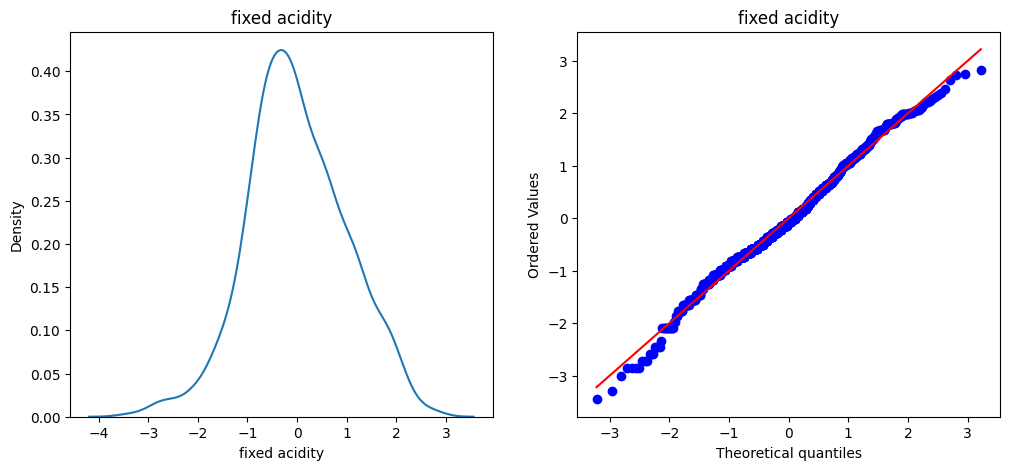

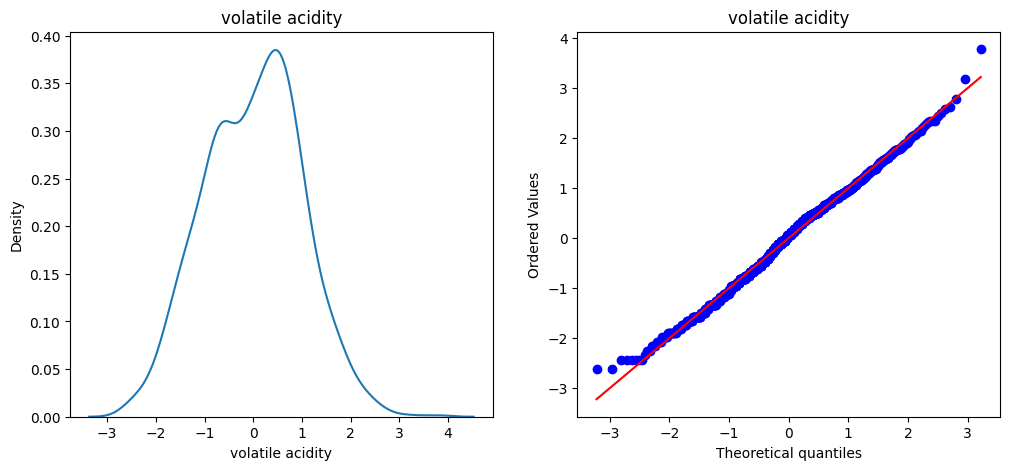

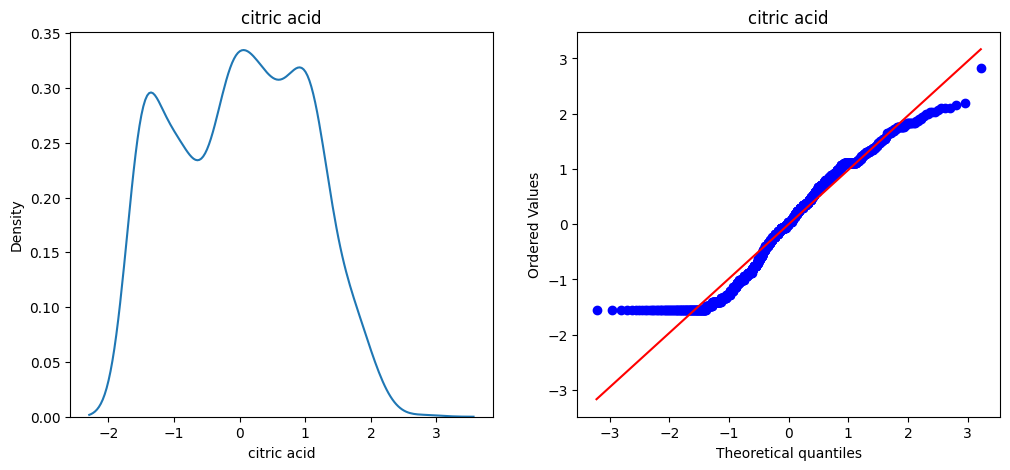

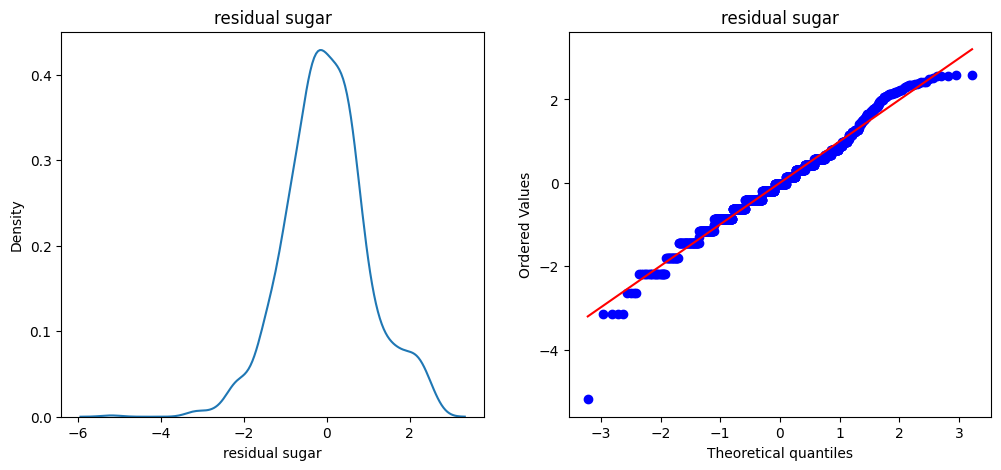

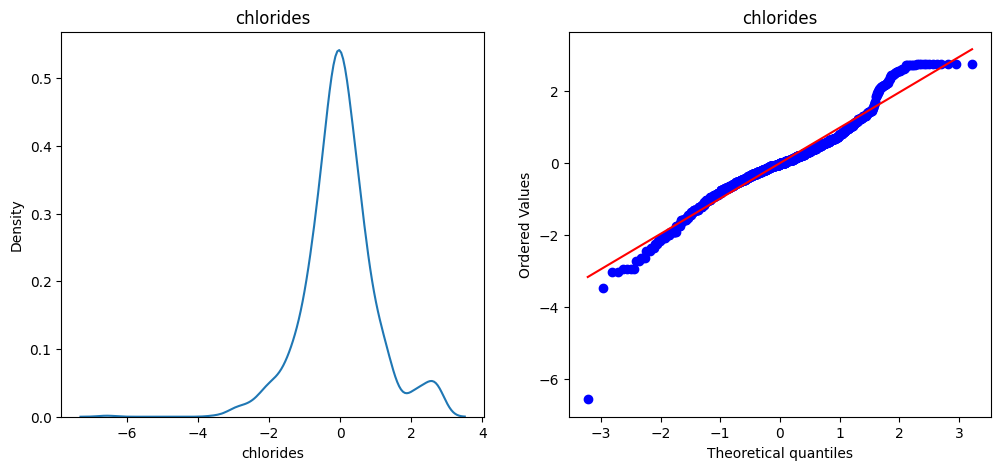

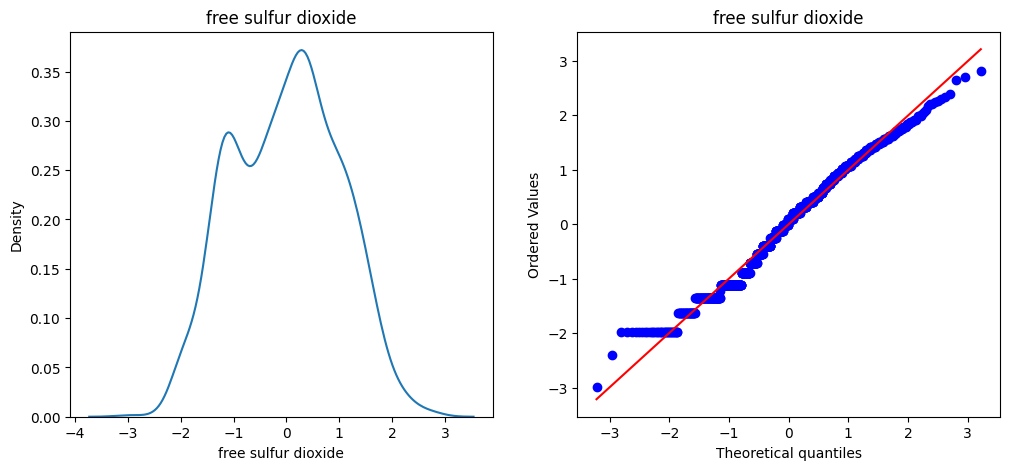

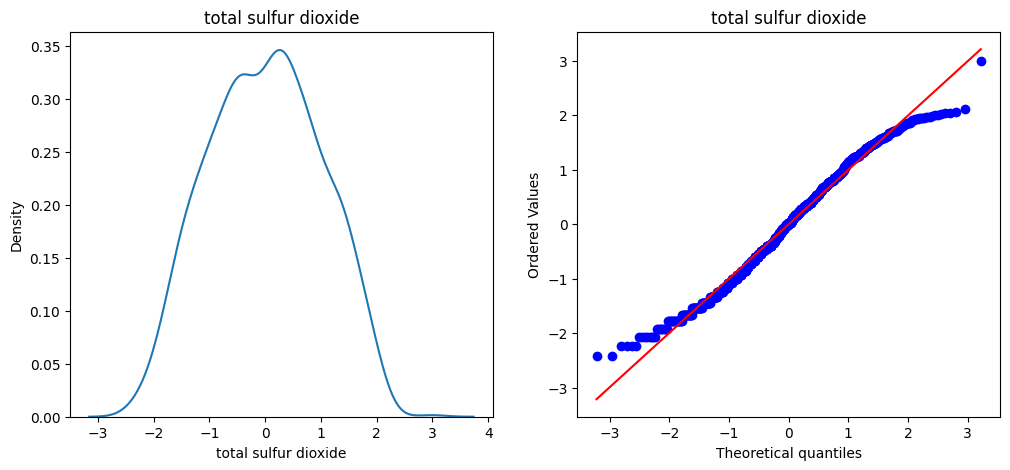

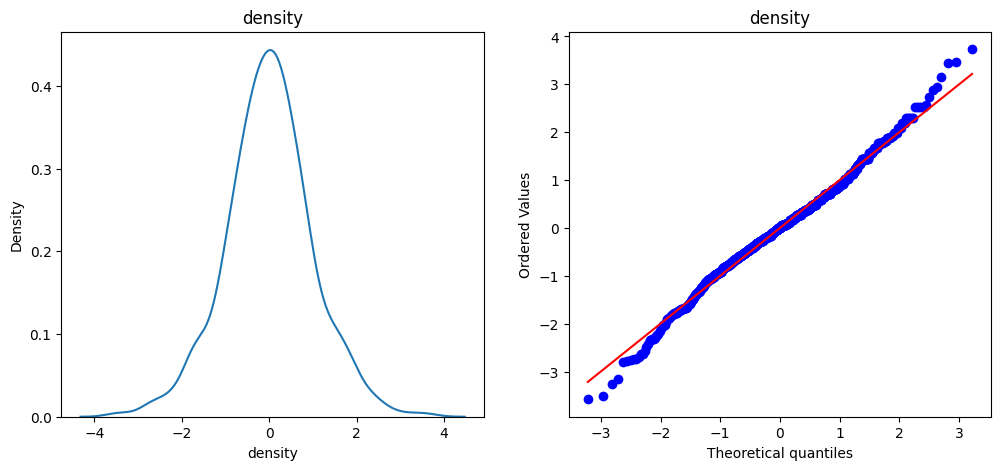

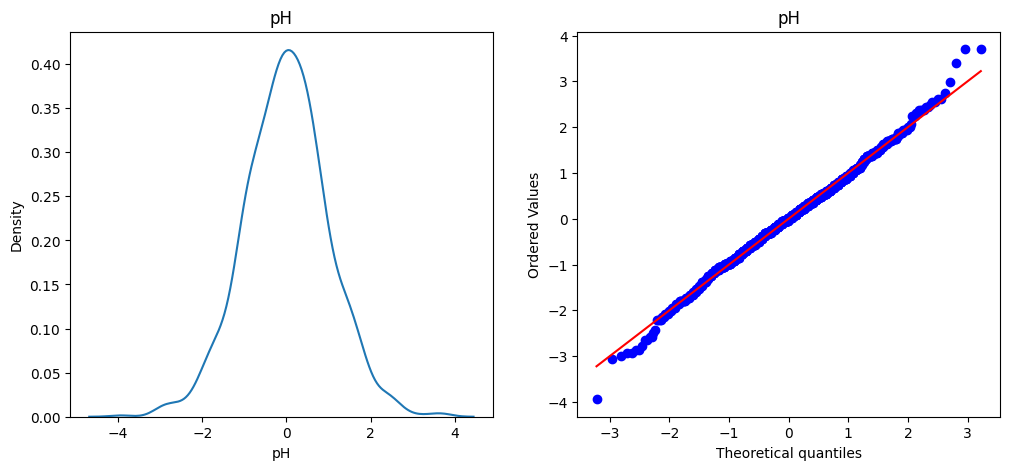

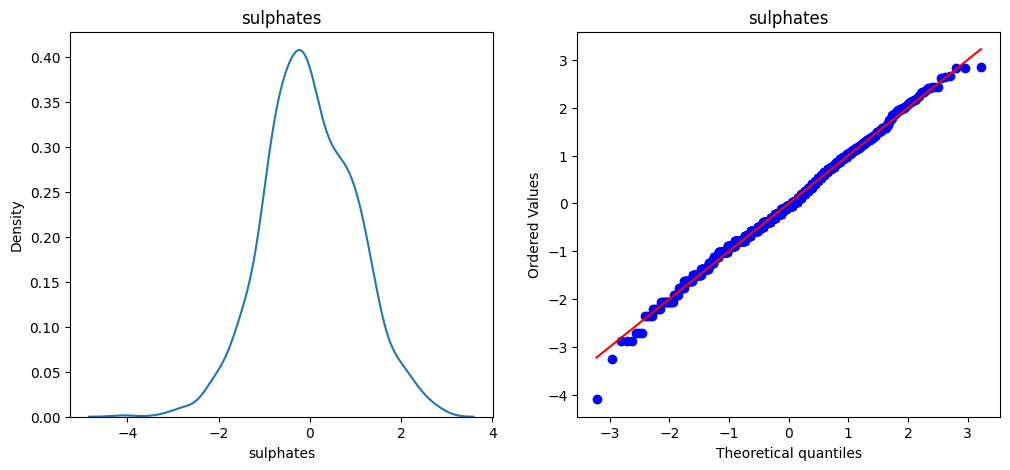

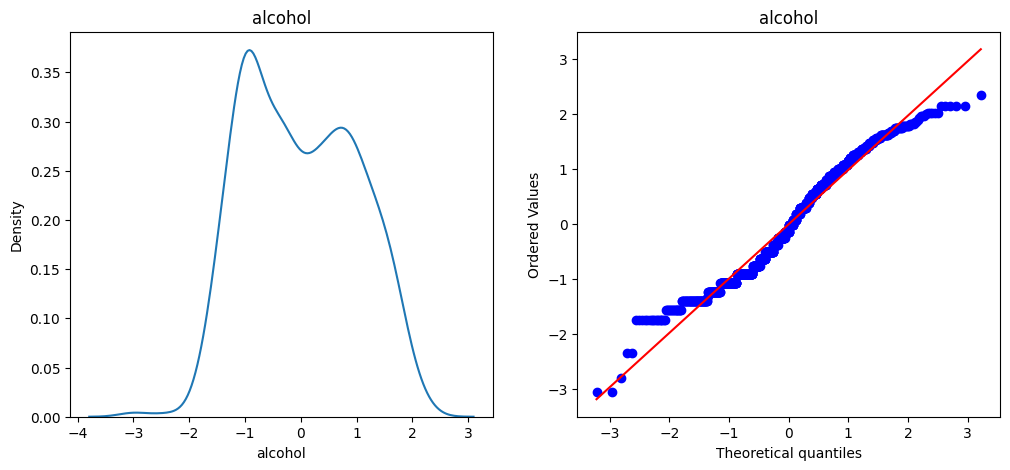

In [19]:
#Kde and QQ plot after applying powertransformation(Including Standarization)
for column in X_train.columns:
    plt.figure(figsize=(12,5))
    plt.subplot(121)
    sns.kdeplot(X_train_transformed[column])
    plt.title(column)

    plt.subplot(122)
    stats.probplot(X_train_transformed[column],dist='norm',plot=plt)
    plt.title(column)

## 4. Implement k-NN Classification from scratch:

In [20]:
from collections import Counter

class Knn_Classifier:
    def __init__(self, k=5):
        self.n_neighbors = k
        self.X_train = None
        self.y_train = None

    # Required by sklearn
    def get_params(self, deep=True):
        return {"k": self.n_neighbors}
    
    # Required by sklearn
    def set_params(self, **params):
        for key, value in params.items():
            setattr(self, key, value)
        return self
        
    def fit(self, X_train, y_train):
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)
        self.classes_ = np.unique(y)

    def predict(self, X_test):
        X_test = np.array(X_test)
        y_pred = []
        distances=[]

        for test_point in X_test:
            distances=[]
            for train_point in self.X_train:
                dis=self.calculate_distance(test_point,train_point)
                distances.append(dis)

            # Get indices of k nearest neighbors
            # np.argsort(distances) - It sort the distances & store the row number of that train_point and after that we can extract k nearest neighbours
            neighbor_indices = np.argsort(distances)[:self.n_neighbors]  

            # Get majority label
            label = self.majority_count(neighbor_indices)
            y_pred.append(label)

        return np.array(y_pred)

    # It is using for compute the ROC_AUC score
    def predict_proba(self, X_test):
        """
        Returns probability distribution for each class.
        Needed for roc_auc_score, GridSearchCV scoring='roc_auc', etc.
        """
        X_test = np.array(X_test)
        prob_list = []

        for x in X_test:
            distances = np.linalg.norm(self.X_train - x, axis=1)
            idx = np.argsort(distances)[:self.n_neighbors]
            labels = self.y_train[idx]

            # count occurrences of each class
            counts = np.bincount(labels, minlength=len(self.classes_))
            prob = counts / self.n_neighbors                       # normalize to probabilities
            prob_list.append(prob)

        return np.array(prob_list)    

    def calculate_distance(self, point_A, point_B):
            #Euclidean distance between two points
            return np.linalg.norm(point_A - point_B)

    def majority_count(self, neighbor_indices):
        #Count labels of nearest neighbors and return the most common one.
        votes = [self.y_train[i] for i in neighbor_indices]
        vote_counts = Counter(votes)
        return vote_counts.most_common(1)[0][0]

In [21]:
knn_cls=Knn_Classifier()

In [22]:
knn_cls.fit(X_train_transformed,y_train)

In [23]:
y_pred=knn_cls.predict(X_test_transformed)

In [24]:
y_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

### Performance of KNN Models:

In [25]:
print('Accuracy_Score:',accuracy_score(y_test,y_pred))
print('Precision_Score:',precision_score(y_test,y_pred))
print('Recall_Score:',recall_score(y_test,y_pred))
print('F1_Score:',f1_score(y_test,y_pred))
print('Cross Validation Score:',np.mean(cross_val_score(knn_cls,X_train_transformed,y_train,cv=5,scoring='accuracy')))

Accuracy_Score: 0.9007352941176471
Precision_Score: 0.6296296296296297
Recall_Score: 0.5
F1_Score: 0.5573770491803278
Cross Validation Score: 0.8666257979960259


In [26]:
knn=Knn_Classifier()
knn.fit(X_train_transformed,y_train)
y_prob =knn.predict_proba(X_test_transformed)[:, 1]
auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC =", auc)

ROC-AUC = 0.815064260998517


## Apply KNN with PCA:

In [27]:
# Apply PCA on the standardized features
pca = PCA(n_components=8)
X_train_pca = pca.fit_transform(X_train_transformed)
X_test_pca = pca.transform(X_test_transformed)

# Train a K-Nearest Neighbors (KNN) classifier with PCA
knn_with_pca = Knn_Classifier()
knn_with_pca.fit(X_train_pca, y_train)

# Predict the wine type on the testing set with PCA
y_pred_pca = knn_with_pca.predict(X_test_pca)

# Evaluate the classification accuracy with PCA
accuracy_pca = accuracy_score(y_test, y_pred_pca)

print("KNN having features -", X_train_pca.shape[1])
print("Classification Accuracy with PCA: {:.2f}%".format(accuracy_pca * 100))

KNN having features - 8
Classification Accuracy with PCA: 88.60%


## 5. Comapre With Standard Classifier:

### (i).Logistic Regression:

In [28]:
lor=LogisticRegression(random_state=42)
lor.fit(X_train_transformed,y_train)
y_pred_lor=lor.predict(X_test_transformed)

In [29]:
print('Accuracy_Score:',accuracy_score(y_test,y_pred_lor))
print('Precision_Score:',precision_score(y_test,y_pred_lor))
print('Recall_Score:',recall_score(y_test,y_pred_lor))
print('F1_Score:',f1_score(y_test,y_pred_lor))
print('CV Score:',np.mean(cross_val_score(LogisticRegression(),X_train_transformed,y_train,cv=5,scoring='accuracy')))

Accuracy_Score: 0.9080882352941176
Precision_Score: 0.6666666666666666
Recall_Score: 0.5294117647058824
F1_Score: 0.5901639344262295
CV Score: 0.8684606603813471


In [30]:
y_prob = lor.predict_proba(X_test_transformed)[:, 1]
auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC for Logistic Regression=", auc)

ROC-AUC for Logistic Regression= 0.8913741967375185


### (ii).Decision Tree Classifier:

In [31]:
dtc=DecisionTreeClassifier(random_state=42)
dtc.fit(X_train_transformed,y_train)
y_pred_dtc=dtc.predict(X_test_transformed)

In [32]:
print('Accuracy_Score:',accuracy_score(y_test,y_pred_dtc))
print('Precision_Score:',precision_score(y_test,y_pred_dtc))
print('Recall_Score:',recall_score(y_test,y_pred_dtc))
print('F1_Score:',f1_score(y_test,y_pred_dtc))
print('CV Score:',np.mean(cross_val_score(DecisionTreeClassifier(),X_train,y_train,cv=10,scoring='accuracy')))

Accuracy_Score: 0.8860294117647058
Precision_Score: 0.5405405405405406
Recall_Score: 0.5882352941176471
F1_Score: 0.5633802816901409
CV Score: 0.8270217465171594


In [33]:
y_prob = dtc.predict_proba(X_test_transformed)[:, 1]
auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC for Decision Tree Classifier=", auc)

ROC-AUC for Decision Tree Classifier= 0.7584033613445379


### (iii).Random Forest Classifier:

In [34]:
rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_train_transformed,y_train)
y_pred_rfc=rfc.predict(X_test_transformed)

In [35]:
print('Accuracy_Score:',accuracy_score(y_test,y_pred_rfc))
print('Precision_Score:',precision_score(y_test,y_pred_rfc))
print('Recall_Score:',recall_score(y_test,y_pred_rfc))
print('F1_Score:',f1_score(y_test,y_pred_rfc))
print('CV Score:',np.mean(cross_val_score(RandomForestClassifier(),X_train,y_train,cv=10,scoring='accuracy')))

Accuracy_Score: 0.9007352941176471
Precision_Score: 0.6842105263157895
Recall_Score: 0.38235294117647056
F1_Score: 0.49056603773584906
CV Score: 0.8711688752973157


In [36]:
y_prob = rfc.predict_proba(X_test_transformed)[:, 1]
auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC for RandomForestClassifier=", auc)

ROC-AUC for RandomForestClassifier= 0.8967498764211567


### (iv).SVM Classifier:

In [37]:
svc=SVC(probability=True)
svc.fit(X_train_transformed,y_train)
y_pred_svc=svc.predict(X_test_transformed)

In [38]:
print('Accuracy_Score:',accuracy_score(y_test,y_pred_svc))
print('Precision_Score:',precision_score(y_test,y_pred_svc))
print('Recall_Score:',recall_score(y_test,y_pred_svc))
print('F1_Score:',f1_score(y_test,y_pred_svc))
print('CV Score:',np.mean(cross_val_score(SVC(),X_train,y_train,cv=5,scoring='accuracy')))

Accuracy_Score: 0.9080882352941176
Precision_Score: 0.8
Recall_Score: 0.35294117647058826
F1_Score: 0.4897959183673469
CV Score: 0.8620048196846067


In [39]:
y_prob = svc.predict_proba(X_test_transformed)[:, 1]
auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC for SVC=", auc)

ROC-AUC for SVC= 0.8739495798319327


## 6.Handle Class Imbalance:

In [40]:
print(wine['Quality_Label'].value_counts())
print("--> % of",wine['Quality_Label'].value_counts()/len(wine))
#From below result,we can say that dataset is imbalanced

Quality_Label
0    1175
1     184
Name: count, dtype: int64
--> % of Quality_Label
0    0.864606
1    0.135394
Name: count, dtype: float64


In [41]:
X_train_res, y_train_res = SMOTE(sampling_strategy=0.8).fit_resample(X_train_transformed, y_train)

print("Before SMOTE:", y_train.value_counts(normalize=True))
print("After SMOTE:", y_train_res.value_counts(normalize=True))

Before SMOTE: Quality_Label
0    0.862006
1    0.137994
Name: proportion, dtype: float64
After SMOTE: Quality_Label
0    0.555753
1    0.444247
Name: proportion, dtype: float64


In [42]:
X_train_res.shape

(1686, 11)

In [43]:
y_train_res.shape

(1686,)

In [44]:
y_train_res.value_counts()

Quality_Label
0    937
1    749
Name: count, dtype: int64

In [45]:
X_train_res

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.518298,-0.823583,0.715318,-0.017572,-0.637835,-0.129500,-0.396995,-0.986579,-0.246900,0.821886,1.661336
1,-1.079615,1.001818,-1.007387,0.562448,0.995264,0.102370,-0.447511,-0.023880,0.861325,-0.392788,-0.020965
2,-0.905801,0.290267,-1.340740,-1.144490,0.188243,0.489676,-0.084962,0.056656,0.861325,0.034354,-0.248618
3,-0.431017,0.907031,-0.516024,-0.869178,-0.093580,-0.129500,0.067564,0.539430,1.244473,0.528693,-0.370030
4,-0.148286,0.452693,-0.400436,0.147739,-0.194593,0.400618,0.530495,0.432213,0.797070,-0.301700,-0.248618
...,...,...,...,...,...,...,...,...,...,...,...
1681,-2.634990,-0.309677,-1.372682,-1.243079,-1.895631,0.543974,1.409695,-2.372054,1.811196,0.225841,1.673884
1682,0.854043,-0.726081,0.820564,2.351300,-0.484415,0.425381,0.009289,0.963603,-0.114733,1.176115,0.703811
1683,0.660240,-0.940021,0.746642,-1.070393,-1.800142,0.732581,0.424262,-0.880554,-0.709265,1.150140,0.664701
1684,0.268722,-1.390602,0.990168,-0.080017,0.640288,-1.110475,-1.600084,-1.153879,-0.522519,-0.128897,1.510734


## 7. Hyperparameters tuning with GridsearchCV() with handling the Imbalancing of dataset:

### (i).KNN Classifier:

In [46]:
pipeline = Pipeline([
    ('smote', SMOTE(sampling_strategy=0.8,random_state=42)),
    ('model', knn_cls)
])

param_grid={
    'model__n_neighbors':[1,3,5,7,9,11,13,15],
    'model__weights':['uniform','distance']
}

grid = GridSearchCV(
    pipeline,
    param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

grid.fit(X_train_transformed, y_train)

,estimator,Pipeline(step...3B87A61940>)])
,param_grid,"{'model__n_neighbors': [1, 3, ...], 'model__weights': ['uniform', 'distance']}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,sampling_strategy,0.8


In [47]:
grid.best_params_

{'model__n_neighbors': 9, 'model__weights': 'uniform'}

In [48]:
grid.best_score_

np.float64(0.5041084424581391)

In [49]:
best_model = grid.best_estimator_

y_test_knn = best_model.predict(X_test_transformed)
print("Accuracy_Score of KNN after handle Imbalancing: ",accuracy_score(y_test,y_test_knn))

scores = cross_val_score(pipeline, X_train_transformed, y_train, cv=10, scoring='accuracy')
print("Cross Validation Score After Handle Imbalancing:",scores.mean())

from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_knn))

Accuracy_Score of KNN after handle Imbalancing:  0.7132352941176471
Cross Validation Score After Handle Imbalancing: 0.7911569826707442
              precision    recall  f1-score   support

           0       0.95      0.71      0.81       238
           1       0.27      0.76      0.40        34

    accuracy                           0.71       272
   macro avg       0.61      0.74      0.61       272
weighted avg       0.87      0.71      0.76       272



### (ii).Logistic Regression:

In [50]:
pipeline = Pipeline([
    ('smote', SMOTE(sampling_strategy=0.8,random_state=42)),
    ('model', LogisticRegression())
])

param_grid={
    'model__C': [0.01, 0.1, 1, 10],
    'model__max_iter':[50,100,150,200],
    'model__class_weight': [None, 'balanced']
}

grid = GridSearchCV(
    pipeline,
    param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

grid.fit(X_train_transformed, y_train)

,estimator,Pipeline(step...egression())])
,param_grid,"{'model__C': [0.01, 0.1, ...], 'model__class_weight': [None, 'balanced'], 'model__max_iter': [50, 100, ...]}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,sampling_strategy,0.8


In [51]:
grid.best_params_

{'model__C': 10, 'model__class_weight': None, 'model__max_iter': 50}

In [52]:
grid.best_score_

np.float64(0.5379837804370553)

In [53]:
best_model = grid.best_estimator_

y_test_lor = best_model.predict(X_test_transformed)
print("Accuracy_Score of Logistic Regression after handle Imbalancing: ",accuracy_score(y_test,y_test_lor))

scores = cross_val_score(pipeline, X_train_transformed, y_train, cv=10, scoring='accuracy')
print("Cross Validation Score After Handle Imbalancing:",scores.mean())

from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_lor))

Accuracy_Score of Logistic Regression after handle Imbalancing:  0.8235294117647058
Cross Validation Score After Handle Imbalancing: 0.8049184505606524
              precision    recall  f1-score   support

           0       0.97      0.83      0.89       238
           1       0.40      0.79      0.53        34

    accuracy                           0.82       272
   macro avg       0.68      0.81      0.71       272
weighted avg       0.89      0.82      0.85       272



### (iii). DecisionTreeClassifier:

In [54]:
pipeline = Pipeline([
    ('smote', SMOTE(sampling_strategy=0.8,random_state=42)),
    ('model', DecisionTreeClassifier())
])

param_grid={
    'model__criterion':['gini','entropy','log_loss'],
    'model__max_depth':[None,5,10,15,20],
    'model__max_features':[0.25,0.5,0.75,1.0],  
    'model__class_weight': [None, 'balanced']
}

grid = GridSearchCV(
    pipeline,
    param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

grid.fit(X_train_transformed, y_train)

,estimator,Pipeline(step...lassifier())])
,param_grid,"{'model__class_weight': [None, 'balanced'], 'model__criterion': ['gini', 'entropy', ...], 'model__max_depth': [None, 5, ...], 'model__max_features': [0.25, 0.5, ...]}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,sampling_strategy,0.8


In [55]:
grid.best_params_

{'model__class_weight': 'balanced',
 'model__criterion': 'entropy',
 'model__max_depth': 5,
 'model__max_features': 0.75}

In [56]:
grid.best_score_

np.float64(0.4954913185812062)

In [57]:
best_model = grid.best_estimator_

y_test_dtc = best_model.predict(X_test_transformed)
print("Accuracy_Score of Decision_Tree_Classifier after handle Imbalancing: ",accuracy_score(y_test,y_test_dtc))

scores = cross_val_score(pipeline, X_train_transformed, y_train, cv=10, scoring='accuracy')
print("Cross Validation Score After Handle Imbalancing:",scores.mean())

from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_dtc))

Accuracy_Score of Decision_Tree_Classifier after handle Imbalancing:  0.7647058823529411
Cross Validation Score After Handle Imbalancing: 0.8058698606863745
              precision    recall  f1-score   support

           0       0.98      0.74      0.85       238
           1       0.34      0.91      0.49        34

    accuracy                           0.76       272
   macro avg       0.66      0.83      0.67       272
weighted avg       0.90      0.76      0.80       272



### (iv).RandomForestClassifier:

In [58]:
pipeline = Pipeline([
    ('smote', SMOTE(sampling_strategy=0.8, random_state=42)),
    ('model', RandomForestClassifier(class_weight='balanced_subsample',random_state=42))
])

param_grid = [
    {
        'model__bootstrap': [True],
        'model__n_estimators': [50,100,200,300],
        'model__max_depth': [None,10,20],
        'model__max_samples': [0.25,0.5,0.75],
        'model__max_features': [0.5,0.75,1],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 3, 5]
    },
    {
        'model__bootstrap': [False],
        'model__n_estimators': [50,100,200,300],
        'model__max_depth': [None,10,20],
        'model__max_features': [0.5,0.75,1],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 3, 5]
    }
]


grid = GridSearchCV(
    pipeline,
    param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

grid.fit(X_train_transformed, y_train)

,estimator,Pipeline(step...m_state=42))])
,param_grid,"[{'model__bootstrap': [True], 'model__max_depth': [None, 10, ...], 'model__max_features': [0.5, 0.75, ...], 'model__max_samples': [0.25, 0.5, ...], ...}, {'model__bootstrap': [False], 'model__max_depth': [None, 10, ...], 'model__max_features': [0.5, 0.75, ...], 'model__min_samples_leaf': [1, 3, ...], ...}]"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,sampling_strategy,0.8


In [59]:
grid.best_params_

{'model__bootstrap': True,
 'model__max_depth': None,
 'model__max_features': 1,
 'model__max_samples': 0.25,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__n_estimators': 200}

In [60]:
grid.best_score_

np.float64(0.560379256466213)

In [61]:
best_model = grid.best_estimator_

y_test_rfc = best_model.predict(X_test_transformed)
print("Accuracy_Score of Random_Forest_Classifier after handle Imbalancing: ",accuracy_score(y_test,y_test_rfc))

scores = cross_val_score(pipeline, X_train_transformed, y_train, cv=10, scoring='accuracy')
print("Cross Validation Score After Handle Imbalancing:",scores.mean())

from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_rfc))

Accuracy_Score of Random_Forest_Classifier after handle Imbalancing:  0.8713235294117647
Cross Validation Score After Handle Imbalancing: 0.8491250424736663
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       238
           1       0.49      0.79      0.61        34

    accuracy                           0.87       272
   macro avg       0.73      0.84      0.76       272
weighted avg       0.91      0.87      0.88       272



In [62]:
y_prob_roc_rf = best_model.predict_proba(X_test_transformed)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob_roc_rf)
print("ROC-AUC:", roc_auc)

ROC-AUC: 0.9067597627286209


### (v).SVC:

In [63]:
pipeline = Pipeline([
    ('smote', SMOTE(sampling_strategy=0.8,random_state=42)),
    ('model', SVC())
])

param_grid = {
    "model__kernel": ["linear", "rbf", "poly"],
    "model__C": [0.1, 1, 10, 50],
    "model__gamma": ["scale", "auto"],
    "model__degree": [2, 3],     # only used when kernel = 'poly'
    "model__class_weight": [None, "balanced"]
}

grid = GridSearchCV(
    pipeline,
    param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

grid.fit(X_train_transformed, y_train)

,estimator,"Pipeline(step...del', SVC())])"
,param_grid,"{'model__C': [0.1, 1, ...], 'model__class_weight': [None, 'balanced'], 'model__degree': [2, 3], 'model__gamma': ['scale', 'auto'], ...}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,sampling_strategy,0.8


In [64]:
grid.best_params_

{'model__C': 0.1,
 'model__class_weight': 'balanced',
 'model__degree': 3,
 'model__gamma': 'scale',
 'model__kernel': 'poly'}

In [65]:
grid.best_score_

np.float64(0.5605018308167541)

In [66]:
best_model = grid.best_estimator_

y_test_svc = best_model.predict(X_test_transformed)
print("R2_Score of SVC after handle Imbalancing: ",accuracy_score(y_test,y_test_svc))

scores = cross_val_score(pipeline, X_train_transformed, y_train, cv=10, scoring='accuracy')
print("Cross Validation Score After Handle Imbalancing:",scores.mean())

from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_svc))

R2_Score of SVC after handle Imbalancing:  0.8529411764705882
Cross Validation Score After Handle Imbalancing: 0.8380479102956168
              precision    recall  f1-score   support

           0       0.96      0.87      0.91       238
           1       0.45      0.76      0.57        34

    accuracy                           0.85       272
   macro avg       0.71      0.82      0.74       272
weighted avg       0.90      0.85      0.87       272

